# Pricnciple Component Analysis
### The note book implements the PCA on synthetic dataset
#### 8 August 2021
#### Ibrahim Radwan

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D # <--- This is important for 3d plotting 

In [5]:
# Create a synthetic dataset
means = [2.13, -99, 0.11, -1.01] # 4 columns with different means
# Covariance matrix - generalization of the concept of variance to the multivariate case 
cov_matrix = np.array([[1, 0.96, 0, 0], [0.96, 1, 0, 0], [0, 0, 1, 0.87], [0, 0, 0.87, 1]]) 
print('Covariance matrix')
print(cov_matrix)

n = 100 # number of rows
dataset = np.random.multivariate_normal(means, cov_matrix, n)
print("\nDataset:\n", dataset)
print("\nDataset shape:\n", dataset.shape)

Covariance matrix
[[1.   0.96 0.   0.  ]
 [0.96 1.   0.   0.  ]
 [0.   0.   1.   0.87]
 [0.   0.   0.87 1.  ]]

Dataset:
 [[ 2.22072062e+00 -9.84908340e+01  9.54717336e-01  1.00785576e-01]
 [ 1.23393185e+00 -9.94994105e+01 -2.98714479e-02 -1.38403062e+00]
 [ 3.36349125e+00 -9.73807854e+01  5.99186116e-01 -1.35715701e+00]
 [ 2.93677438e+00 -9.82949882e+01  2.75905613e-01 -7.95924579e-01]
 [ 2.50424329e+00 -9.86296582e+01  2.53206628e-01 -1.36917617e+00]
 [ 2.50289799e+00 -9.81904644e+01 -4.98768322e-01 -2.19707614e+00]
 [ 2.15160127e+00 -9.90186048e+01 -3.04523173e-01 -1.68680681e+00]
 [ 1.51413141e+00 -9.94333111e+01 -3.44613599e-01 -1.25712460e+00]
 [ 1.49396676e+00 -9.94193434e+01  1.49464484e+00 -3.01413851e-02]
 [ 8.43706622e-01 -1.00292570e+02  4.96280652e-02 -1.35503114e+00]
 [ 1.69110706e+00 -9.94574860e+01 -1.44229781e+00 -2.80746882e+00]
 [ 1.51140624e+00 -9.95781803e+01 -6.67008798e-01 -2.00949740e+00]
 [ 4.13161213e+00 -9.75152436e+01 -1.86834959e-02 -1.24402951e+00]
 [ 3.37

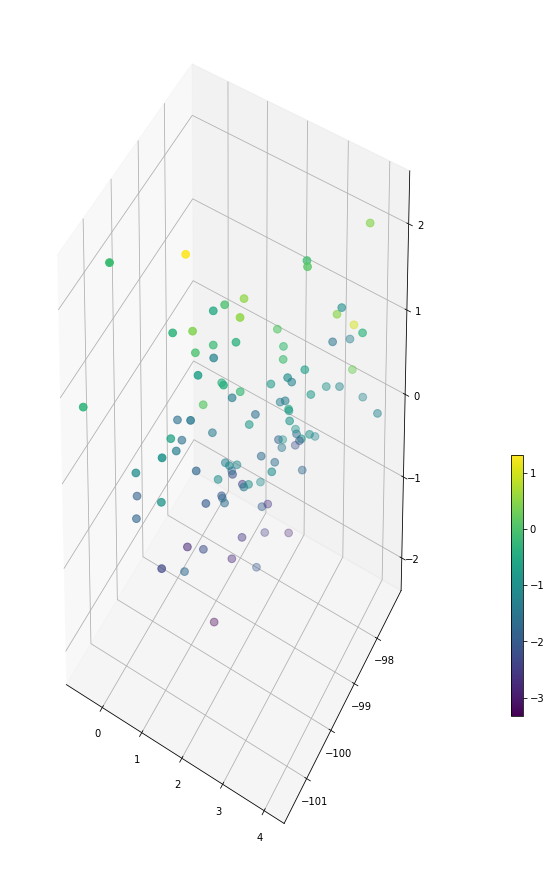

In [6]:
# Let us plot the data
fig = plt.figure(figsize=(8, 16))
ax = fig.add_subplot(111, projection='3d')
img = ax.scatter(xs=dataset[:,0], ys=dataset[:,1], zs=dataset[:,2], c=dataset[:,3], s=60)

cax = fig.add_axes([ax.get_position().x1+0.10, ax.get_position().y0+0.14, 0.02,
                    ax.get_position().height*0.3])
fig.colorbar(img, cax=cax)

plt.show()

### 1. Data standardization

In [7]:
print('Before standardization')
print('Mean:\n',dataset.mean(axis=0))
print('Standard deviation:\n',dataset.std(axis=0))

# Standardization
dataset_standardizated = (dataset - np.mean(dataset, axis=0)) / np.std(dataset, axis=0)

print('\nAfter standardization')
print('Mean:\n',dataset_standardizated.mean(axis=0))
print('Standard deviation:\n',dataset_standardizated.std(axis=0))

Before standardization
Mean:
 [  1.96275728 -99.14389264   0.11235211  -1.09591057]
Standard deviation:
 [0.92905602 0.9362601  0.88345114 0.90445589]

After standardization
Mean:
 [-2.02060590e-16 -3.47144535e-14  9.86016824e-17 -5.43454171e-16]
Standard deviation:
 [1. 1. 1. 1.]


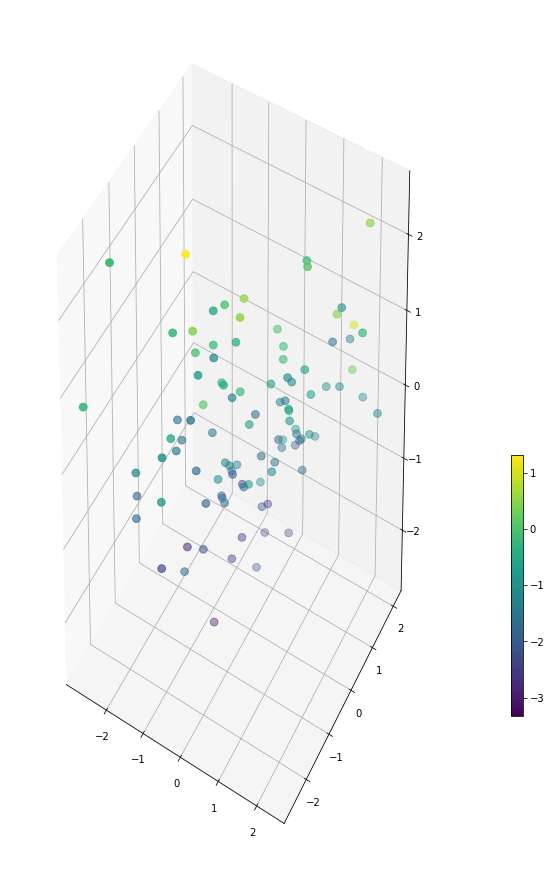

In [8]:
# Let us plot the standardised data
fig = plt.figure(figsize=(8, 16))
ax = fig.add_subplot(111, projection='3d')
img = ax.scatter(xs=dataset_standardizated[:,0], ys=dataset_standardizated[:,1], zs=dataset_standardizated[:,2], c=dataset[:,3], s=60)

cax = fig.add_axes([ax.get_position().x1+0.10, ax.get_position().y0+0.14, 0.02,
                    ax.get_position().height*0.3])
fig.colorbar(img, cax=cax)

plt.show()

### 2. Creating a covariance matrix.

In [9]:
covariance_matrix = np.cov(dataset_standardizated.T)
covariance_matrix

array([[1.01010101, 0.96663278, 0.07118406, 0.11213168],
       [0.96663278, 1.01010101, 0.08697475, 0.12417152],
       [0.07118406, 0.08697475, 1.01010101, 0.85726767],
       [0.11213168, 0.12417152, 0.85726767, 1.01010101]])

### 3. Eigen Decomposition.

In [10]:
eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)
print('eigenvalues:\n',eigenvalues,'\n\neigenvectors:\n',eigenvectors)

eigenvalues:
 [2.12724628 1.71781083 0.04332958 0.15201735] 

eigenvectors:
 [[-0.56026697 -0.43209142 -0.70667292 -0.00336276]
 [-0.56595678 -0.42270612  0.70729528 -0.02731007]
 [-0.41637848  0.57387637 -0.01742429 -0.70497608]
 [-0.43866023  0.55252371  0.00657009  0.7086971 ]]


### 4. Explained total variance.

[0.526, 0.425, 0.038, 0.011]


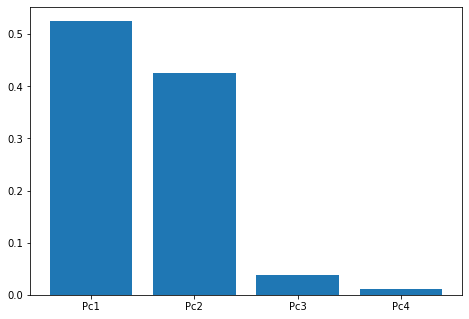

In [11]:
explained_variance = [round((i/np.sum(eigenvalues)), 3) for i in sorted(eigenvalues, reverse=True)]
print(explained_variance)
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
x_axis_labels = ['Pc1', 'Pc2', 'Pc3', 'Pc4']
ax.bar(x_axis_labels,explained_variance)
plt.show()

### 5. Feature transformation.

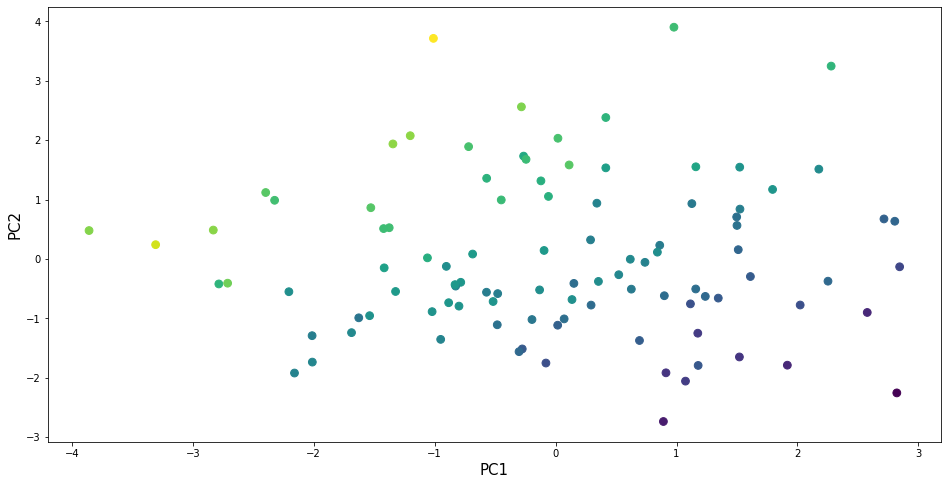

In [13]:
eigenpairs = [(np.abs(eigenvalues[i]), eigenvectors[:, i]) for i in range(len(eigenvalues))]
eigenpairs.sort(key = lambda k: k[0], reverse=True)

w = np.hstack((eigenpairs[0][1][:, np.newaxis],
               eigenpairs[1][1][:, np.newaxis]))
pc1 = dataset_standardizated.dot(w.T[0])
pc2 = dataset_standardizated.dot(w.T[1])

fig = plt.figure(figsize=(16, 8))
ax = fig.add_subplot(111)
ax.scatter(x=pc1, y=pc2, c=dataset[:,3], s=60)
ax.set_xlabel(xlabel='PC1', rotation=0, size=15)
ax.set_ylabel(ylabel='PC2', rotation=90,size=15)
plt.show()